In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from google.colab import files

In [2]:
#pip install plotly

In [3]:
#Get the data from local repository
path = "https://raw.githubusercontent.com/adityakilari/HrAnalytics/main/DataRaw/WA_Fn-UseC_-HR-Employee-Attrition.csv"
df_raw = pd.read_csv(path)


In [4]:
print("Number of Rows: {}\nNumber of Columns: {}".format(df_raw.shape[0], df_raw.shape[1]))

Number of Rows: 1470
Number of Columns: 35


In [5]:
df_raw.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df_raw.duplicated().sum()

0

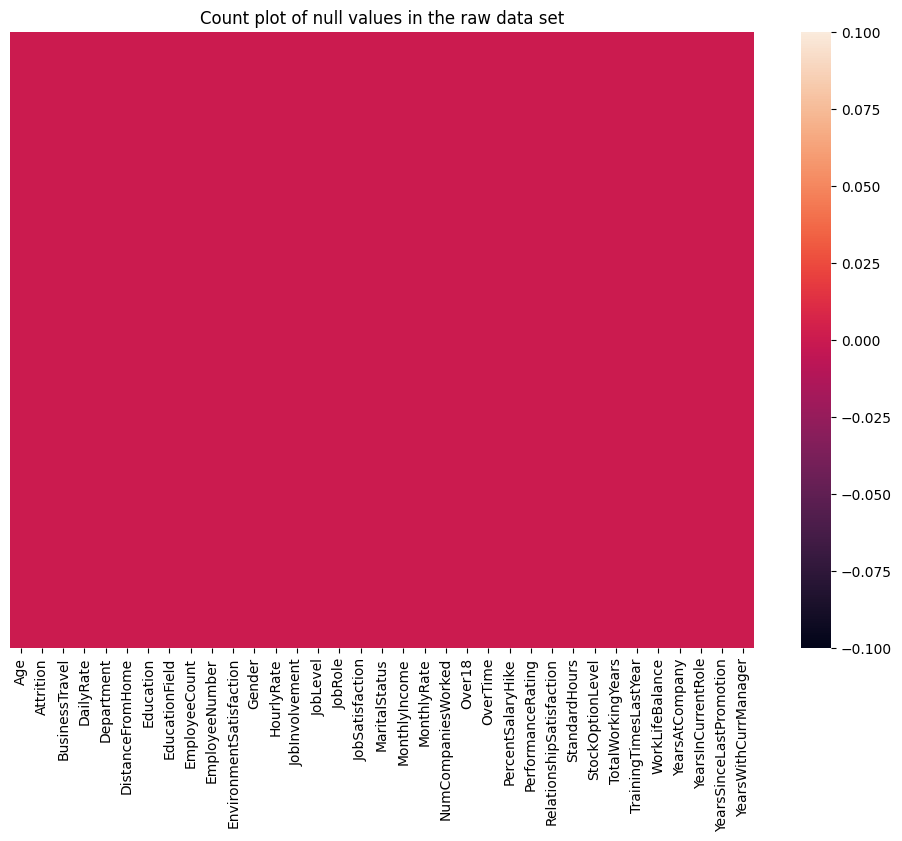

In [7]:
# We can also visualize the null values using heat map

plt.figure(figsize = (12, 8))
sns.heatmap(df_raw.isnull(), yticklabels = False)
plt.title("Count plot of null values in the raw data set")
plt.savefig("Countplot_nullvalues.png")
plt.show()

In [8]:
df_raw.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
df_cleanData= df_raw.copy()

In [10]:
df_cleanData.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [11]:
df_cleanData = df_cleanData.drop(['Over18'],axis=1)

In [12]:
def plot_cat(attr):
    
    plt.figure(figsize = (12, 8))
    
    if(attr=='JobRole'):
        ax = sns.countplot( y= attr, data = df_cleanData, palette='winter_r' , hue='Attrition')
        
            
        plt.title(attr + 'Vs Attrition Distribution')
        return
    
    
    ax = sns.countplot(x=attr, data = df_cleanData, hue='Attrition')
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+10))
    
    plt.title(attr + 'Vs Attrition Distribution')
    #plt.savefig('cat_'+attr+'.png')
    
    

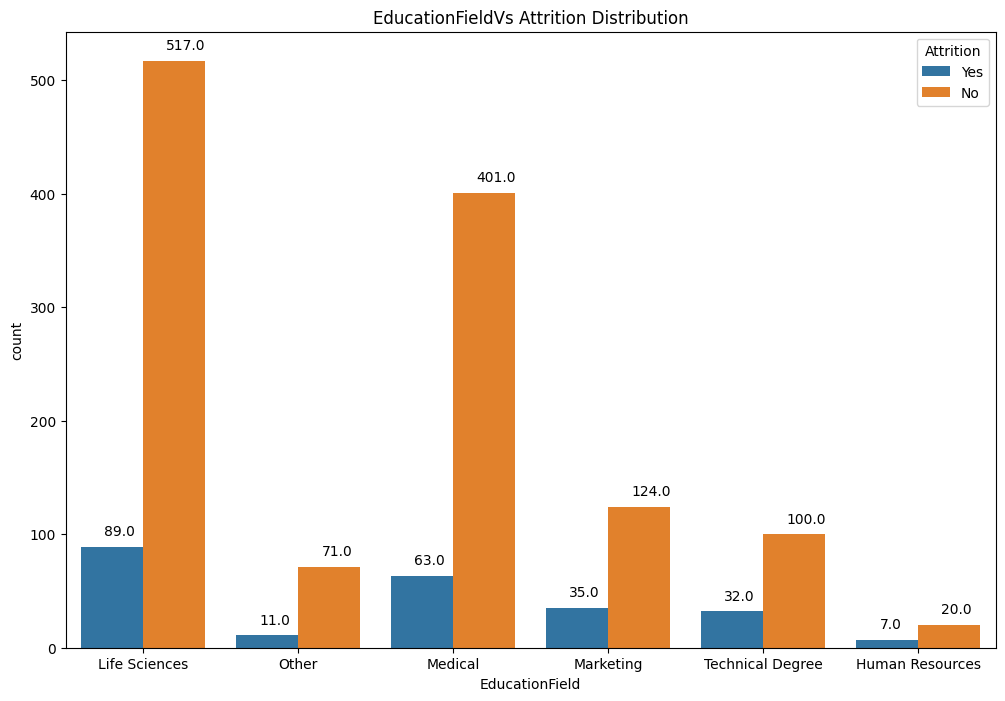

In [13]:
plot_cat('EducationField')
result = pd.crosstab(columns=[df_cleanData.Attrition],index=[df_cleanData['EducationField']],margins=True,normalize='index')
result.to_csv("cat_EducationField.csv")

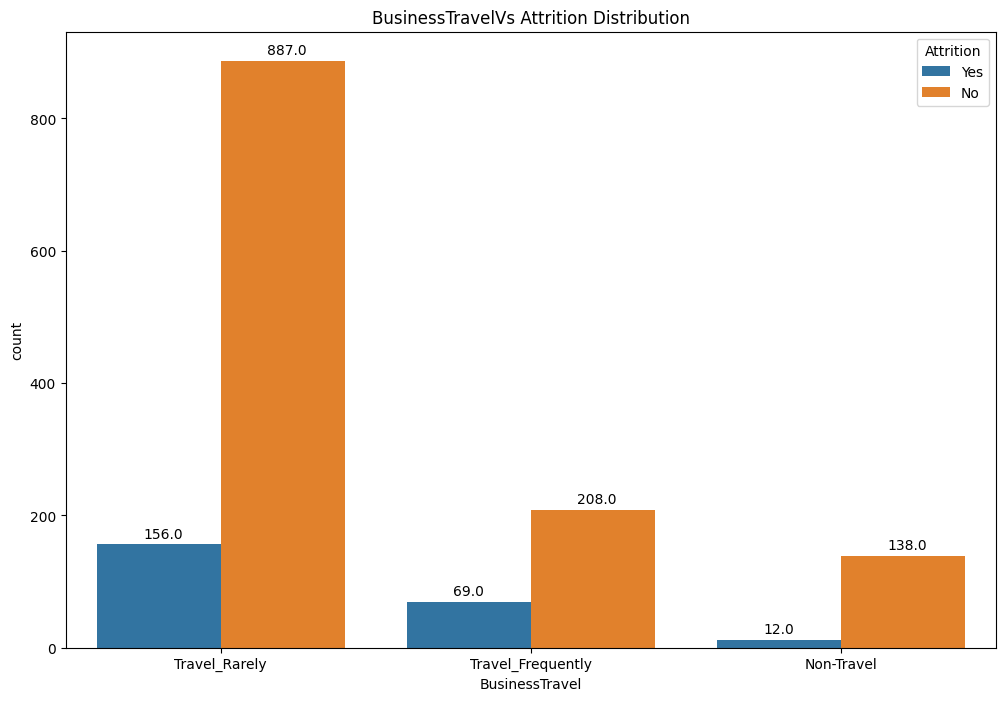

In [14]:
plot_cat('BusinessTravel')
result= pd.crosstab(columns=[df_cleanData.Attrition],index=[df_cleanData['BusinessTravel']],margins=True,normalize='index')
result.to_csv("cat_BusinessTravel.csv")

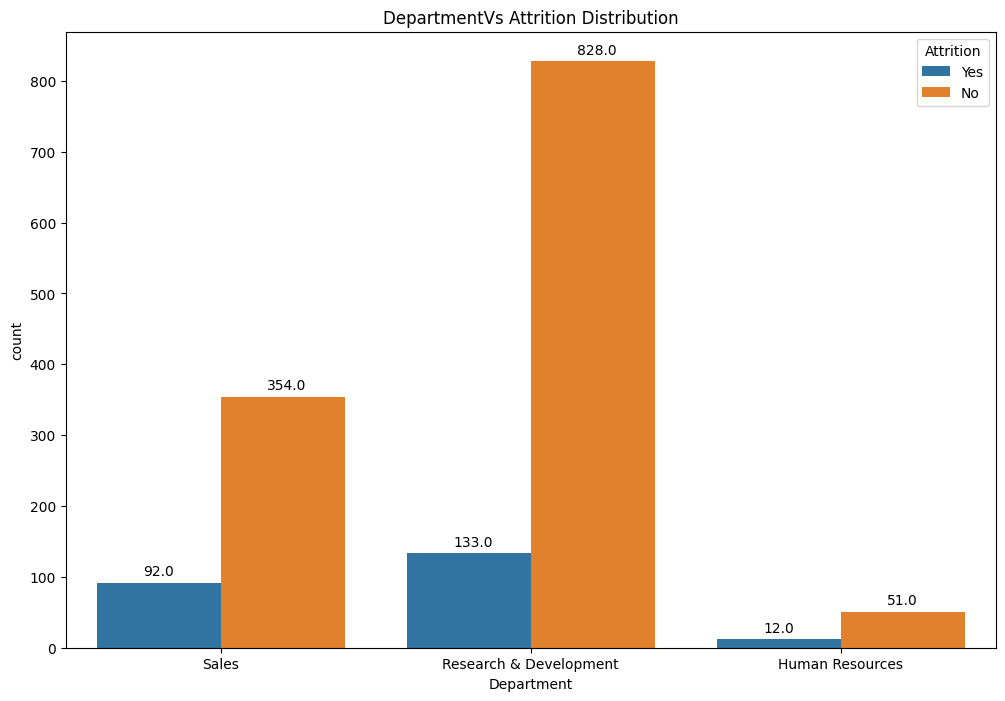

In [15]:
plot_cat('Department')
result = pd.crosstab(columns=[df_cleanData.Attrition],index=[df_cleanData['Department']],margins=True,normalize='index')
result.to_csv("cat_Department.csv")

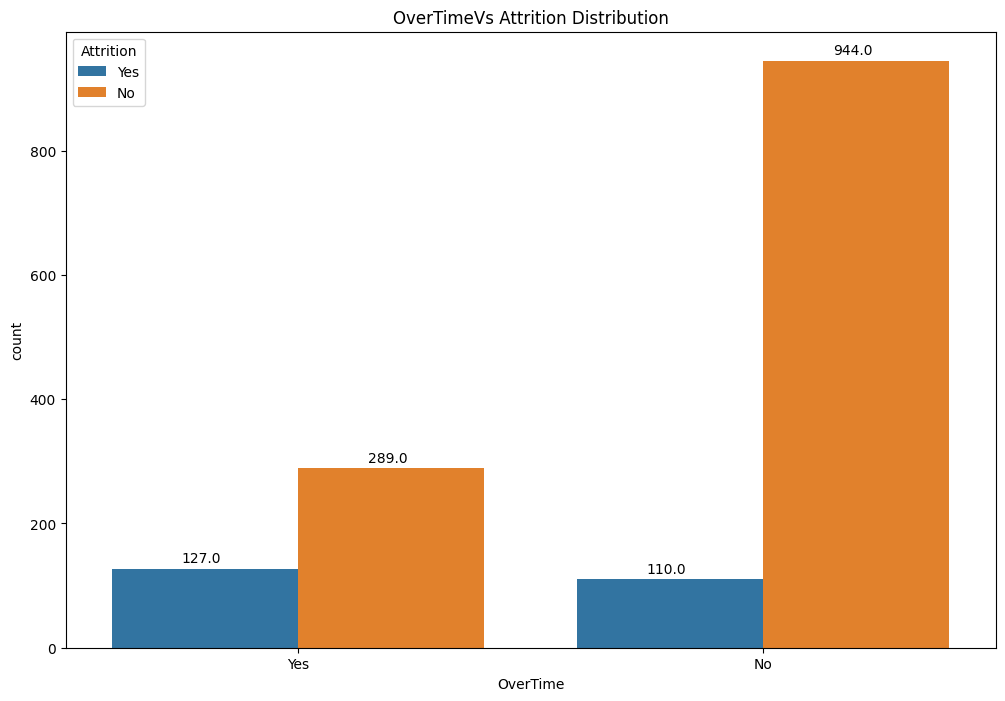

In [16]:
plot_cat('OverTime')
result = pd.crosstab(columns=[df_cleanData.Attrition],index=[df_cleanData['OverTime']],margins=True,normalize='index')
result.to_csv("cat_OverTime.csv")

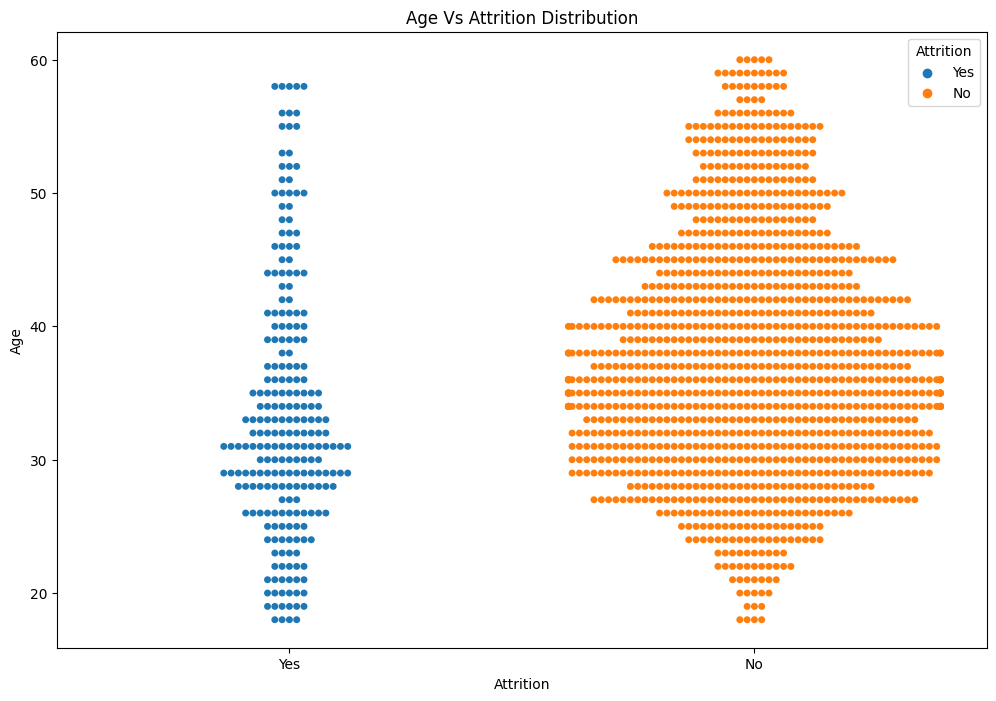

In [17]:
plt.figure(figsize = (12, 8))
sns.swarmplot(x="Attrition", y="Age", data = df_cleanData, hue='Attrition')

plt.title('Age Vs Attrition Distribution')
plt.savefig('num_Age.png')
result= pd.crosstab(columns=[df_cleanData.Attrition],index=[df_cleanData.Age],margins=True,normalize='index')
result.to_csv("num_Age.csv")


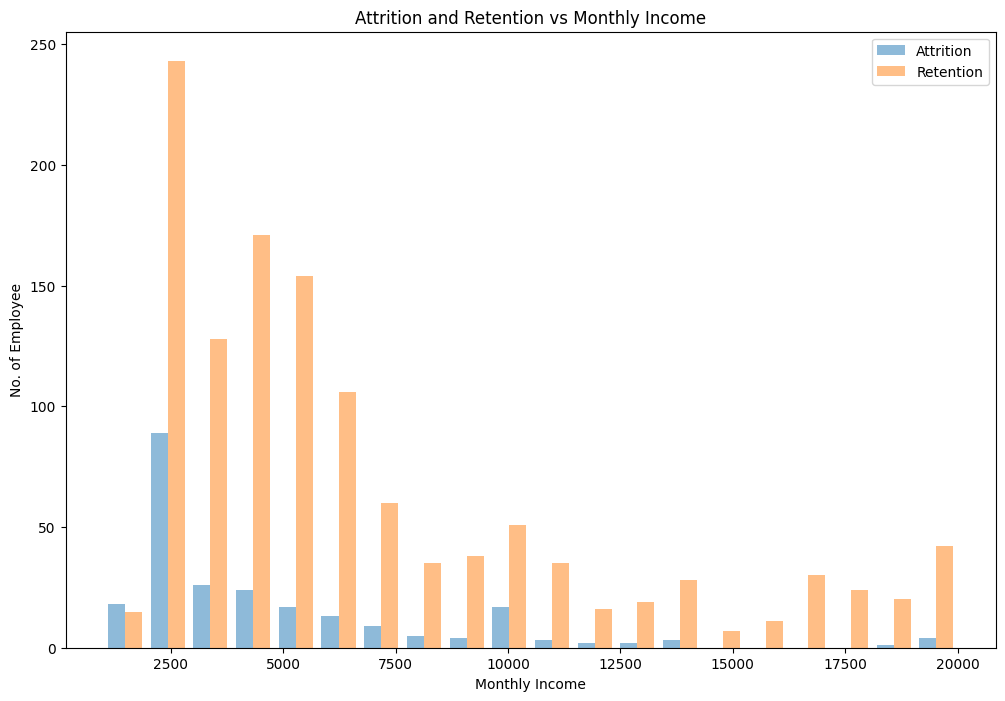

In [18]:
# Create a histogram
plt.figure(figsize = (12, 8))
ax= plt.hist([df_cleanData[df_cleanData['Attrition']=='Yes']['MonthlyIncome'], df_cleanData[df_cleanData['Attrition']=='No']['MonthlyIncome']], 
         bins=20, alpha=0.5, label=['Attrition', 'Retention'])

# Add axis labels and title
plt.xlabel('Monthly Income')
plt.ylabel('No. of Employee')
plt.title('Attrition and Retention vs Monthly Income')

# Add a legend
plt.legend()
plt.savefig('num_Monthly_Income.png')
# Show the plot
plt.show()

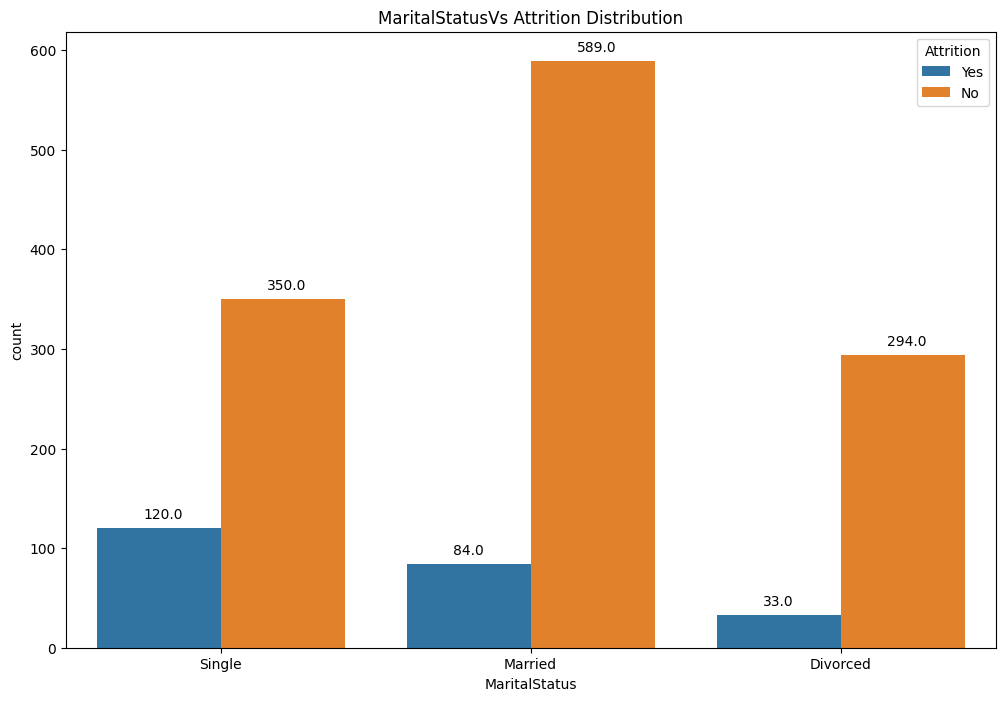

In [19]:
plot_cat('MaritalStatus')
result=pd.crosstab(columns=[df_cleanData.Attrition],index=[df_cleanData['MaritalStatus']],margins=True,normalize='index')
result.to_csv("cat_MaritalStatus.csv")

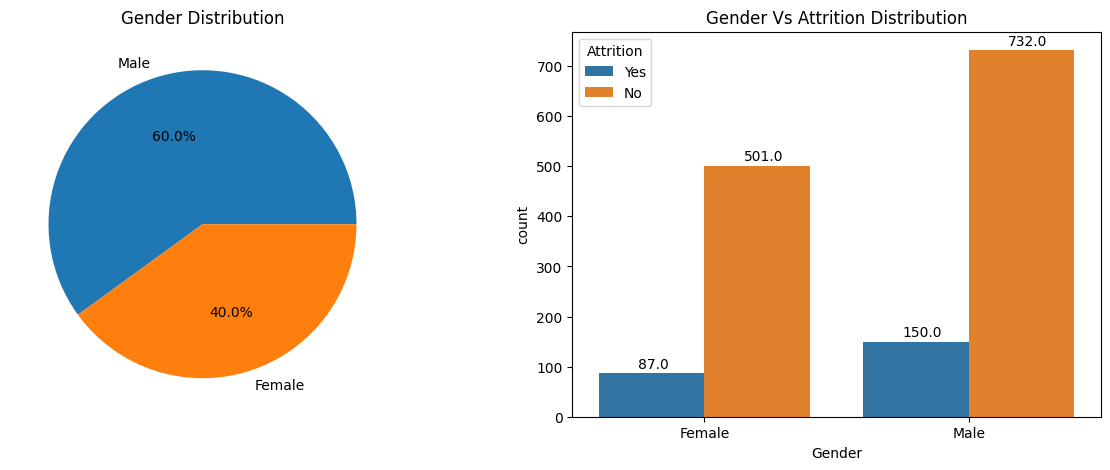

In [20]:
#Distribution of Gender
plt.figure(figsize = (15 , 5))

plt.subplot(1, 2, 2)
plt.title('Gender Vs Attrition Distribution')
ax = sns.countplot(x="Gender", data = df_cleanData, hue='Attrition')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+10))
    
plt.subplot(1, 2, 1)
attrition_counts = df_cleanData['Gender'].value_counts()
labels = ['Male', 'Female']
plt.pie(attrition_counts, labels=labels, autopct='%1.1f%%')
plt.title('Gender Distribution')


plt.savefig('Male_Female_dist.png')
pd.crosstab(columns=[df_cleanData.Attrition],index=[df_cleanData.Gender],margins=True,normalize='index')
result.to_csv("cat_Male_Female_dist.csv")

In [21]:
df_cleanData.select_dtypes(include='int').columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [22]:
df_cleanData = df_cleanData.drop(['DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate','StandardHours'],axis=1)

<ipython-input-23-6ef0d2f601b4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat= df_cleanData.corr()


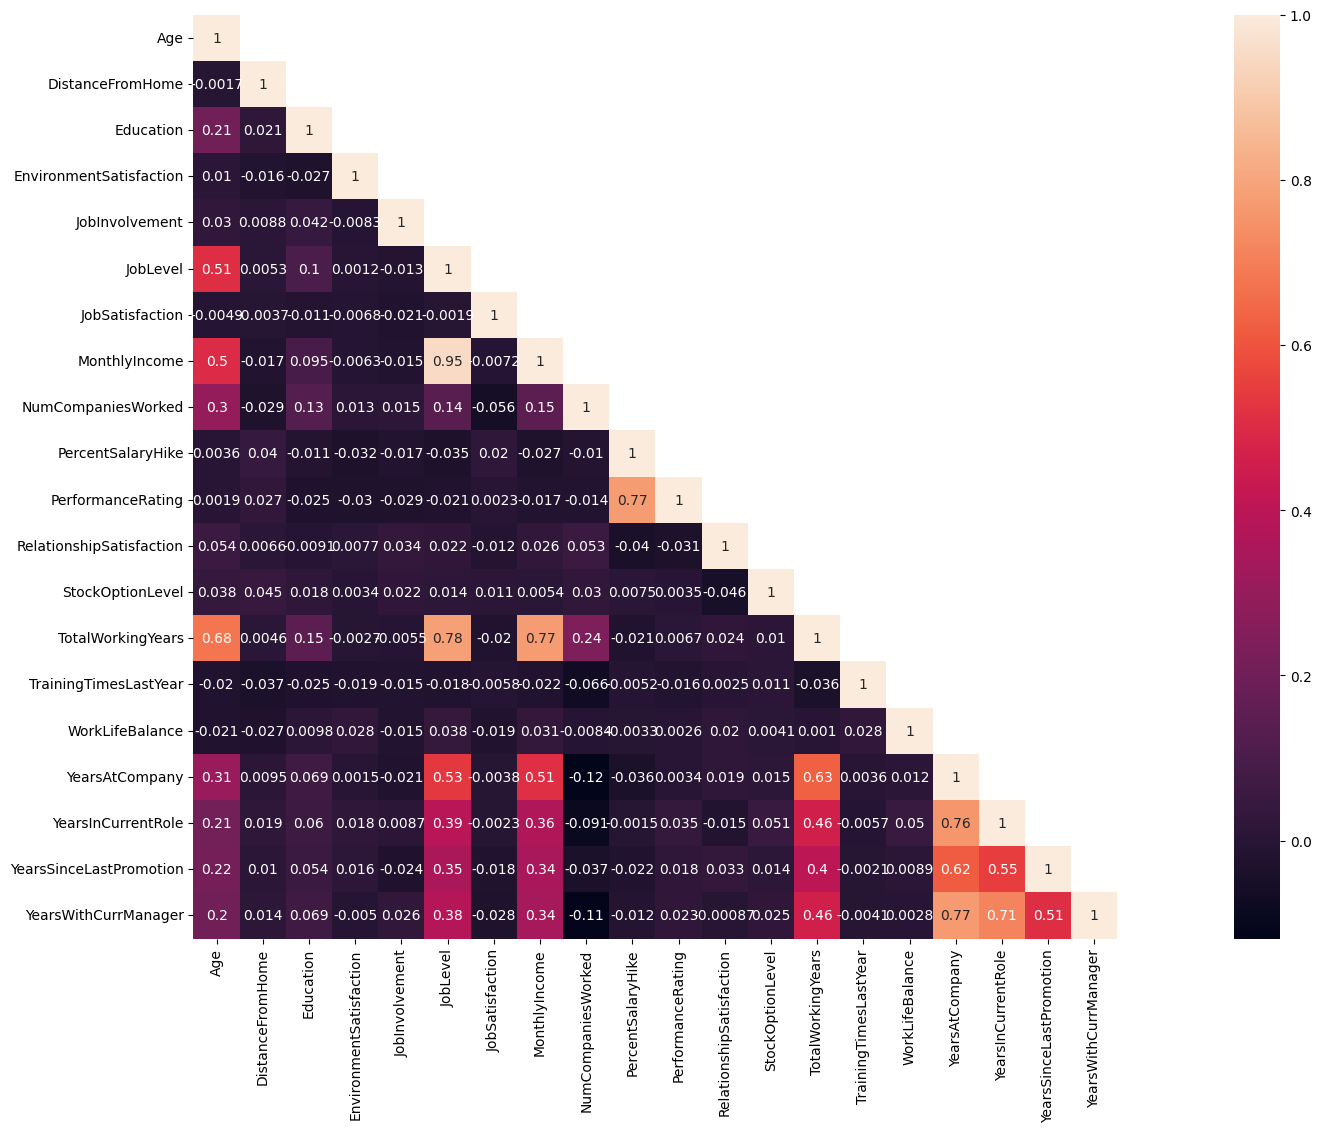

In [23]:
cor_mat= df_cleanData.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)
plt.savefig("cor_mat.png")

In [24]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [25]:
# Finding the number of correlated features
corr_features = correlation(df_cleanData, 0.77)
len(set(corr_features))

<ipython-input-24-765ea232cdcc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


3

In [26]:
corr_features

{'MonthlyIncome', 'PerformanceRating', 'TotalWorkingYears'}

In [27]:
df_cleanData = df_cleanData.drop(['MonthlyIncome','PerformanceRating','TotalWorkingYears'],axis=1)

In [28]:
def plot_num(attr):
    counts = df_cleanData.groupby([attr, 'Attrition']).size().reset_index(name='Count')
    pivoted_counts = counts.pivot(index=attr, columns='Attrition', values='Count')
    
    fig = go.Figure()
    fig.add_trace(go.Bar(x=pivoted_counts.index, y=pivoted_counts['No'], name='Retention'))
    fig.add_trace(go.Bar(x=pivoted_counts.index, y=pivoted_counts['Yes'], name='Attrition'))
    fig.update_layout(
        title='Attrition and Retention against'+ " "+ attr,
        xaxis_title= attr,
        yaxis_title='Employee Count',
        barmode='group'
    )
    
   
    fig.write_image('num_'+attr+'.png')
    fig.show()
    

In [29]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
plot_num('Age')

In [31]:
plot_num('DistanceFromHome')

In [32]:
plot_num('Education')

In [33]:
plot_num('EnvironmentSatisfaction')

In [34]:
plot_num('JobInvolvement')

In [35]:
plot_num('JobLevel')

In [36]:
plot_num('JobSatisfaction')

In [37]:
plot_num('NumCompaniesWorked')

In [38]:
plot_num('PercentSalaryHike')

In [39]:
plot_num('RelationshipSatisfaction')

In [40]:
plot_num('StockOptionLevel')

In [41]:
plot_num('TrainingTimesLastYear')

In [42]:
plot_num('WorkLifeBalance')

In [43]:
plot_num('YearsAtCompany')

In [44]:
plot_num('YearsInCurrentRole')

In [45]:
plot_num('YearsSinceLastPromotion')

In [46]:
plot_num('YearsWithCurrManager')

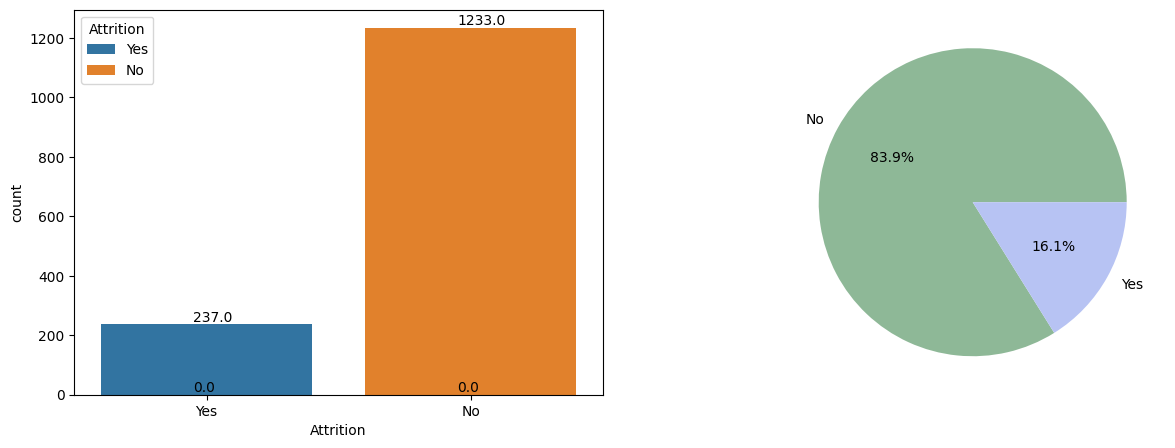

In [47]:
plt.figure(figsize = (15 , 5))


plt.subplot(1, 2, 1)
#plt.title('Attrition Distribution')
ax = sns.countplot(x="Attrition", data = df_cleanData, dodge=False, hue='Attrition')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10))
    

plt.subplot(1, 2, 2)

colors = ['#8EB897', '#B7C3F3']
attrition_counts = df_cleanData['Attrition'].value_counts()
labels = ['No', 'Yes']
plt.pie(attrition_counts, labels=labels, autopct='%1.1f%%', colors=colors)
#plt.title('Attrition Distribution')

plt.savefig('dataImbalance.png')
plt.show()


In [48]:
df_cleanData = pd.get_dummies(df_cleanData, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus','Gender','OverTime'])

df_cleanData.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male,OverTime_No,OverTime_Yes
0,41,Yes,1,2,2,3,2,4,8,11,...,0,1,0,0,0,1,1,0,0,1
1,49,No,8,1,3,2,2,2,1,23,...,1,0,0,0,1,0,0,1,1,0
2,37,Yes,2,2,4,2,1,3,6,15,...,0,0,0,0,0,1,0,1,0,1
3,33,No,3,4,4,3,1,3,1,11,...,1,0,0,0,1,0,1,0,0,1
4,27,No,2,1,1,3,1,2,9,12,...,0,0,0,0,1,0,0,1,1,0


In [49]:
df_cleanData['Attrition'].replace(['Yes', 'No'],[1, 0], inplace=True)


In [50]:
df_cleanData.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director'

In [51]:
print("Number of Rows: {}\nNumber of Columns: {}".format(df_cleanData.shape[0], df_cleanData.shape[1]))

Number of Rows: 1470
Number of Columns: 46


In [52]:
df_cleanData.to_csv('cleanData.csv',index=False)

In [53]:
# Splitting the data frame into dependent and independent variables
X = df_cleanData.drop("Attrition", axis = 1)
y = df_cleanData["Attrition"]

In [54]:
#pip install imblearn

In [55]:
from imblearn.under_sampling import NearMiss

In [56]:
nm = NearMiss()

In [57]:
# Implementing Undersampling for Handling Imbalanced 
X_res,y_res=nm.fit_resample(X,y)

In [58]:
X_res.shape, y_res.shape

((474, 45), (474,))

In [59]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_res, y_res,random_state=42)
mutual_info

array([0.00673439, 0.05123053, 0.        , 0.01024914, 0.00567619,
       0.02141302, 0.00059738, 0.        , 0.03301395, 0.02785337,
       0.0181325 , 0.        , 0.0290796 , 0.05202691, 0.02464723,
       0.0376922 , 0.03704215, 0.        , 0.01183244, 0.01115464,
       0.00581989, 0.01807268, 0.01247571, 0.        , 0.0372131 ,
       0.05401214, 0.        , 0.01962121, 0.        , 0.        ,
       0.00497126, 0.        , 0.01034257, 0.01702122, 0.029065  ,
       0.00639032, 0.        , 0.        , 0.        , 0.00316807,
       0.00902976, 0.        , 0.02081937, 0.06830793, 0.05033465])

In [60]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_res.columns
mutual_info.sort_values(ascending=False)

OverTime_No                          0.068308
EducationField_Marketing             0.054012
YearsAtCompany                       0.052027
DistanceFromHome                     0.051231
OverTime_Yes                         0.050335
YearsSinceLastPromotion              0.037692
EducationField_Life Sciences         0.037213
YearsWithCurrManager                 0.037042
PercentSalaryHike                    0.033014
WorkLifeBalance                      0.029080
JobRole_Research Director            0.029065
RelationshipSatisfaction             0.027853
YearsInCurrentRole                   0.024647
JobLevel                             0.021413
Gender_Male                          0.020819
EducationField_Other                 0.019621
StockOptionLevel                     0.018132
Department_Research & Development    0.018073
JobRole_Manufacturing Director       0.017021
Department_Sales                     0.012476
BusinessTravel_Travel_Frequently     0.011832
BusinessTravel_Travel_Rarely      

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res, y_res,test_size=0.3,random_state=42)

In [62]:
X_train.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male,OverTime_No,OverTime_Yes
391,29,7,3,2,3,1,3,3,13,1,...,0,0,0,1,0,0,1,0,0,1
355,30,5,3,2,3,1,2,0,17,1,...,0,0,0,0,0,1,1,0,1,0
26,37,7,4,4,3,2,1,5,22,3,...,1,0,0,0,1,0,0,1,0,1
7,35,4,2,3,3,1,4,1,12,3,...,0,0,0,1,0,0,0,1,1,0
431,35,12,4,4,3,2,4,3,24,1,...,0,1,0,0,0,1,0,1,0,1


In [63]:
X_train.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Re

In [64]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [65]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [66]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [67]:
classifier_regressor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [68]:
# Making prediction with test data
y_pred = classifier_regressor.predict(X_test)

In [69]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [70]:
# Importing the libraries for evaluating the model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [71]:
# Calculating the accuracy score
score = accuracy_score(y_pred,y_test) * 100

# Printing the score
print(score)

80.41958041958041


In [72]:
# Creating the classification report
print(classification_report(y_pred,y_test))
report=classification_report(y_pred,y_test)
report_path = "classification_report.txt"
text_file = open(report_path, "w")
n = text_file.write(report)
text_file.close()

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        75
           1       0.79      0.81      0.80        68

    accuracy                           0.80       143
   macro avg       0.80      0.80      0.80       143
weighted avg       0.80      0.80      0.80       143



In [73]:
# Creating the confusion matrix of the model
confusion_matrix = confusion_matrix(y_test, y_pred)

# Printing the matrix
print(confusion_matrix)


[[60 13]
 [15 55]]


# Model Training - Decision Tree

In [74]:
# Now using another model for the attrition rate prediction
from sklearn.tree import DecisionTreeClassifier

In [75]:
# Naming the model
dt_model = DecisionTreeClassifier()

In [76]:
# Fitting the model with train data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
# Making predictions with test data 
pred_dt = dt_model.predict(X_test)

In [78]:
# Printing the predctions
pred_dt

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

# Evaluating Model

In [79]:
# Evaluating the model with accuracy score
accuracy_score_dt = accuracy_score(y_test, pred_dt)*100
print('Accuracy score of the model: ',accuracy_score_dt)

Accuracy score of the model:  68.53146853146853


In [80]:
# Importing the required libraries to evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [90]:
# Evaluating the model with classification report
classification_dt = classification_report(pred_dt, y_test)

# Printing the report
print(classification_dt)

report = classification_report(pred_dt, y_test)
report_path = "classification_report_DecisionT.txt"
text_file = open(report_path, "w")
n = text_file.write(report)
text_file.close()

              precision    recall  f1-score   support

           0       0.70      0.69      0.69        74
           1       0.67      0.68      0.68        69

    accuracy                           0.69       143
   macro avg       0.69      0.69      0.69       143
weighted avg       0.69      0.69      0.69       143



In [89]:
# Evaluating the model with confusion matrix
confusion_matrix_dt = confusion_matrix(y_test, pred_dt)

# Printing confusion matrix
print(confusion_matrix_dt)


[[51 22]
 [23 47]]


# Detecting Attrition with sample data

In [83]:
# Detecting attrition with 'Logistic Regression' model

# Data required to predict
data = (32,2,2,4,3,1,4,0,13,3,0,2,2,7,7,3,6,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0)

# Changing the data into numpy array
data_numpy = np.asarray(data)

# Reshaping the data
data_reshape = data_numpy.reshape(1,-1)
result = classifier_regressor.predict(data_reshape)

# Printing result
print(result)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [84]:
if(result == 1):
    print('Employee is out of the company (Attrition)') 
else:
    print('Employee is with the company (Retention)')

Employee is with the company (Retention)


In [85]:
# Detecting attrition with 'Logistic Regression' model

# Data required to predict
data = (37,2,2,4,2,1,3,6,15,2,0,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1)

# Changing the data into numpy array
data_numpy = np.asarray(data)

# Reshaping the data
data_reshape = data_numpy.reshape(1,-1)
result = dt_model.predict(data_reshape)

# Printing result
print(result)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [86]:
if(result == 1):
    print('Employee is out of the company (Attrition)') 
else:
    print('Employee is with the company (Retention)')

Employee is out of the company (Attrition)
